# 📂 Import Library

In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


# 📥 Load Dataset

## ✨ Sumber Data

Data yang digunakan dalam analisis ini berasal dari **data sekunder** yang diambil dari platform **Kaggle**. Dataset ini berkaitan dengan diagnosis gangguan tidur 💤 dan bisa diakses melalui link berikut:  
🔗 [Sleep Disorder Diagnosis Dataset](https://www.kaggle.com/datasets/mdsultanulislamovi/sleep-disorder-diagnosis-dataset/data)  

Data ini akan digunakan untuk melakukan **analisis dan pemodelan** guna memahami pola serta faktor yang memengaruhi gangguan tidur.


In [2]:
filepath = "Sleep_health_and_lifestyle_dataset.csv"

data = pd.read_csv(filepath)

data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## 📝 Keterangan Kolom Data

| **Kolom** | **Deskripsi** |
|-------|-----------|
| Gender | Jenis kelamin responden (Male/Female) |
| Age | Usia dalam tahun |
| Occupation | Pekerjaan atau kategori profesi |
| Sleep Duration (hours) | Lama tidur per hari (jam) |
| Quality of Sleep (1–10) | Rating kualitas tidur subjektif dari 1 (buruk) hingga 10 (sangat baik) |
| Physical Activity Level (minutes/day) | Lama aktivitas fisik harian (menit) |
| Stress Level (1–10) | Rating stres subjektif dari 1 (rendah) hingga 10 (tinggi) |
| BMI Category | Klasifikasi Indeks Massa Tubuh (Underweight, Normal, Overweight) |
| Blood Pressure (systolic/diastolic) | Tekanan darah dalam mmHg, format sistolik/diastolik |
| Heart Rate (bpm) | Detak jantung istirahat per menit |
| Daily Steps | Jumlah langkah per hari |
| Sleep Disorder | Kehadiran gangguan tidur: None, Insomnia, atau Sleep Apnea |

# 🧹 Data Cleaning

## 🔍 Cek Nilai Kosong

Pada tahap ini, dilakukan pemeriksaan apakah terdapat **missing values** atau data yang kosong pada setiap kolom.  
Langkah ini penting untuk mencegah kesalahan saat analisis dan pemodelan.

In [3]:
data = data.replace([None, "None"], np.nan)

data.isnull().sum()


Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

## 🗑️ Penghapusan Data

Jika ditemukan data yang **tidak lengkap atau duplikat**, langkah selanjutnya adalah melakukan **penghapusan baris atau kolom yang bermasalah**.  
Proses ini membantu menjaga keakuratan hasil analisis dan model yang akan dibuat.

In [4]:
duplicate = data.drop_duplicates()
clean_data = data.dropna()

clean_data


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# 📊 Exploratory Data Analysis (EDA)

In [5]:
# Copy data untuk EDA
data_vis = clean_data.copy()

colors = plt.cm.tab20.colors

## 👩‍💼 Distribusi Responden per Occupation
Distribusi responden berdasarkan **Occupation** menunjukkan bagaimana peserta survei tersebar di berbagai jenis pekerjaan. Dari visualisasi ini, kita dapat mengidentifikasi kelompok pekerjaan yang mendominasi dataset dan memahami konteks sosial serta gaya hidup responden. 🌟  


C:\Users\ACER\AppData\Local\Temp\ipykernel_27464\692687673.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(occupation_counts.index, rotation=45, ha='right')


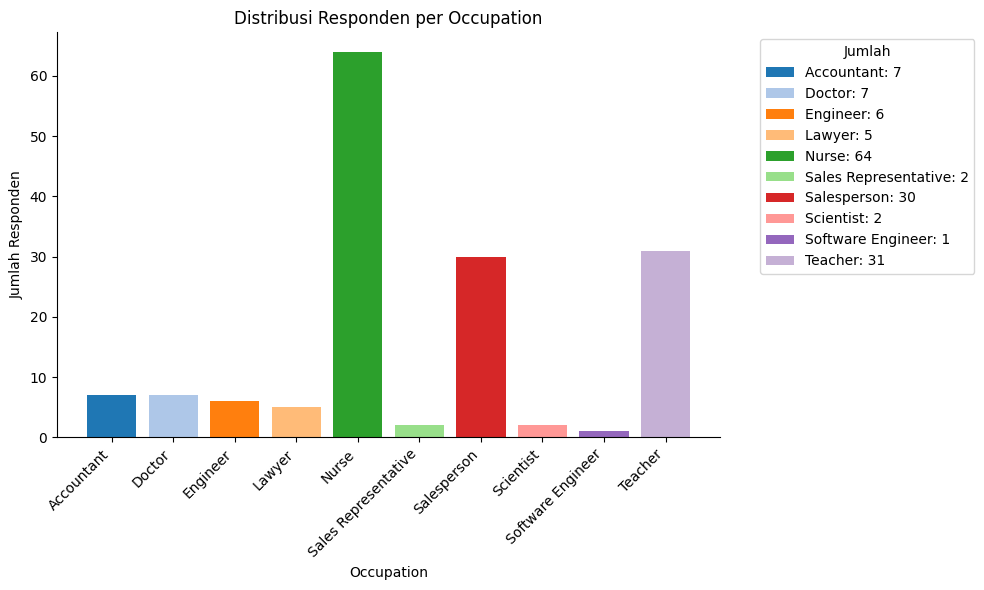

In [6]:
occupation_counts = data_vis['Occupation'].value_counts().sort_index()
occupation_labels = [f"{c}: {v}" for c, v in zip(
    occupation_counts.index, occupation_counts.values)]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(occupation_counts.index, occupation_counts.values,
              color=colors[:len(occupation_counts)])
ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Occupation")
ax.set_title("Distribusi Responden per Occupation")
ax.set_xticklabels(occupation_counts.index, rotation=45, ha='right')
ax.legend(bars, occupation_labels, title="Jumlah",
          bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()


## 👥 Distribusi Responden per Gender
Analisis ini menampilkan jumlah responden **berdasarkan Gender**. Dengan informasi ini, kita bisa melihat keseimbangan antara responden laki-laki dan perempuan. ⚖️  
Penting untuk memastikan dataset tidak terlalu bias ke salah satu gender, karena hal ini bisa memengaruhi model prediksi kesehatan tidur.


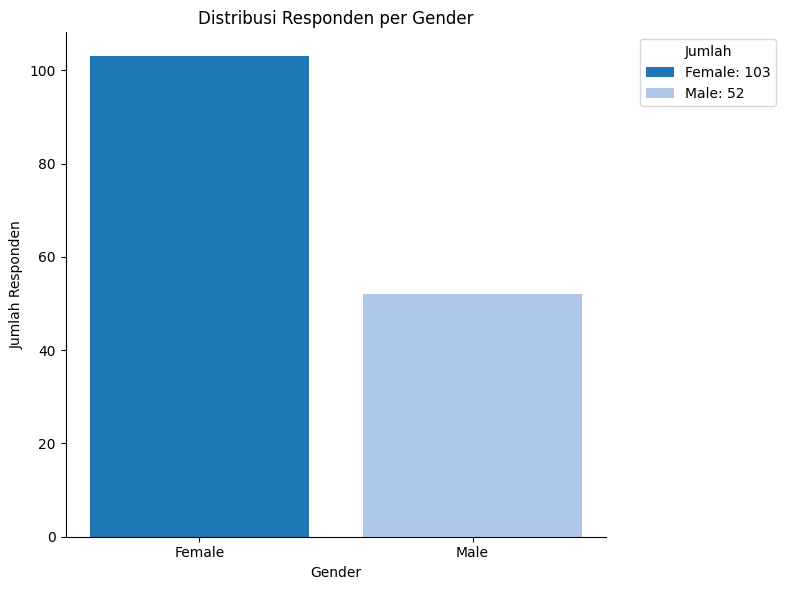

In [7]:
gender_counts = data_vis['Gender'].value_counts().sort_index()
gender_labels = [f"{c}: {v}" for c, v in zip(
    gender_counts.index, gender_counts.values)]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(gender_counts.index, gender_counts.values,
              color=colors[:len(gender_counts)])
ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Gender")
ax.set_title("Distribusi Responden per Gender")
ax.legend(bars, gender_labels, title="Jumlah",
          bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()


## ⚖️ Distribusi Responden per BMI Category
Distribusi **BMI Category** memberikan gambaran kondisi kesehatan fisik responden. 🏋️  
Melalui visualisasi ini, kita dapat melihat proporsi kategori `Underweight`, `Normal`, `Overweight`, dan `Obese`. Informasi ini sangat relevan karena BMI berhubungan dengan kualitas tidur dan tingkat aktivitas fisik.


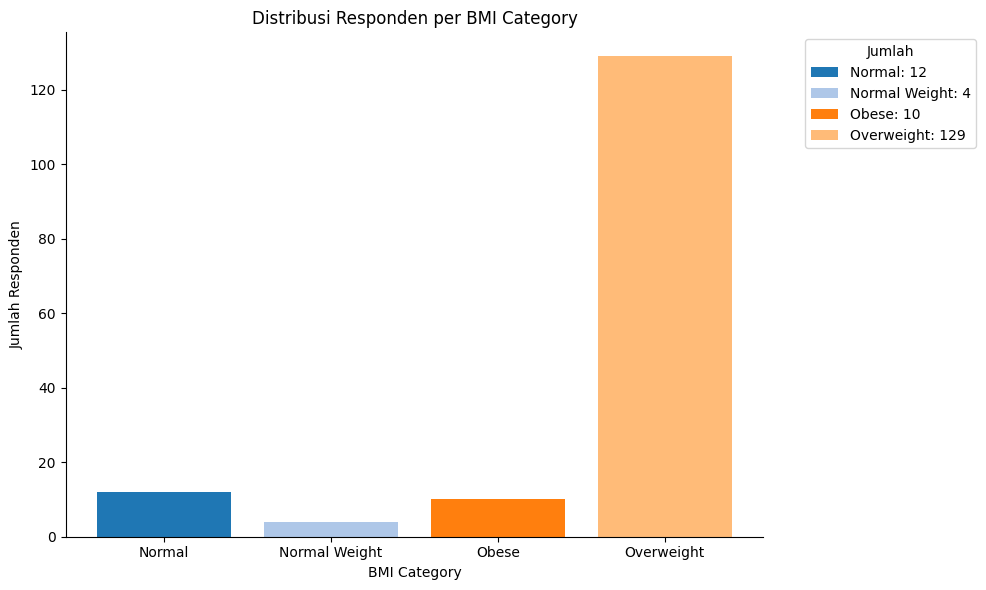

In [8]:
bmi_counts = data_vis['BMI Category'].value_counts().sort_index()
bmi_labels = [f"{c}: {v}" for c, v in zip(bmi_counts.index, bmi_counts.values)]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(bmi_counts.index, bmi_counts.values,
              color=colors[:len(bmi_counts)])
ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("BMI Category")
ax.set_title("Distribusi Responden per BMI Category")
ax.legend(bars, bmi_labels, title="Jumlah",
          bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()


## 💤 Distribusi Responden per Sleep Disorder
Distribusi responden berdasarkan **Sleep Disorder** menunjukkan prevalensi gangguan tidur dalam dataset. 😴  
Dengan informasi ini, kita dapat mengidentifikasi kondisi tidur yang paling umum, seperti `Insomnia` atau `Sleep Apnea`, dan bagaimana hal ini dapat memengaruhi variabel lain dalam analisis.


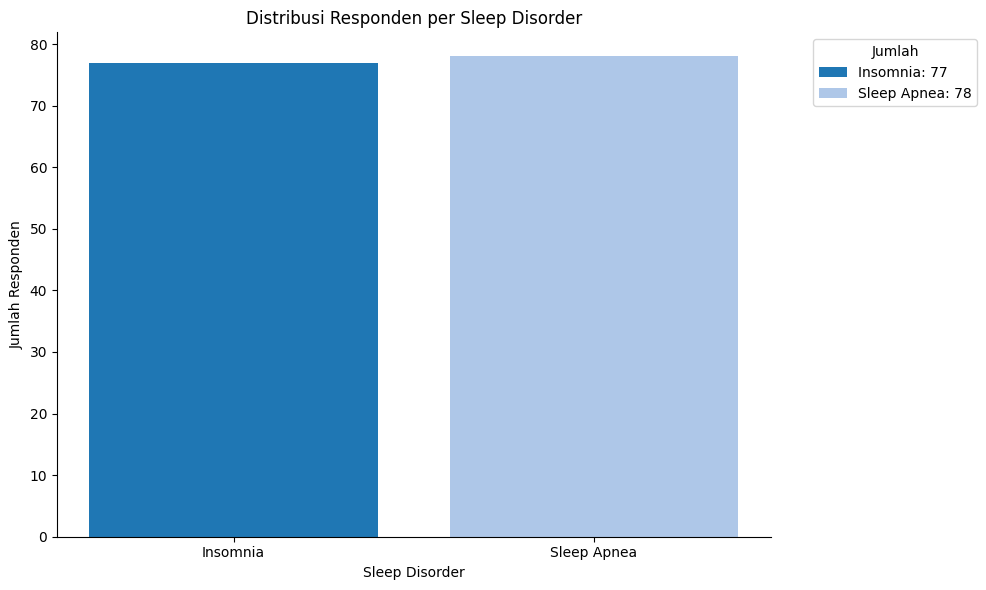

In [9]:
sleep_counts = data_vis['Sleep Disorder'].value_counts().sort_index()
sleep_labels = [f"{c}: {v}" for c, v in zip(
    sleep_counts.index, sleep_counts.values)]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(sleep_counts.index, sleep_counts.values,
              color=colors[:len(sleep_counts)])
ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Sleep Disorder")
ax.set_title("Distribusi Responden per Sleep Disorder")
ax.legend(bars, sleep_labels, title="Jumlah",
          bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()


## 👩‍⚕️ Distribusi Sleep Disorder per Occupation
Visualisasi ini menampilkan **Sleep Disorder vs Occupation** dalam bentuk stacked bar chart. 📊  
Kita dapat melihat perbandingan jumlah gangguan tidur di masing-masing kelompok pekerjaan, misalnya apakah `Nurse` lebih banyak mengalami `Insomnia` dibandingkan `Sleep Apnea`. Ini membantu memahami pola kesehatan tidur berdasarkan pekerjaan.


C:\Users\ACER\AppData\Local\Temp\ipykernel_27464\2716180888.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pivot.index, rotation=45, ha='right')


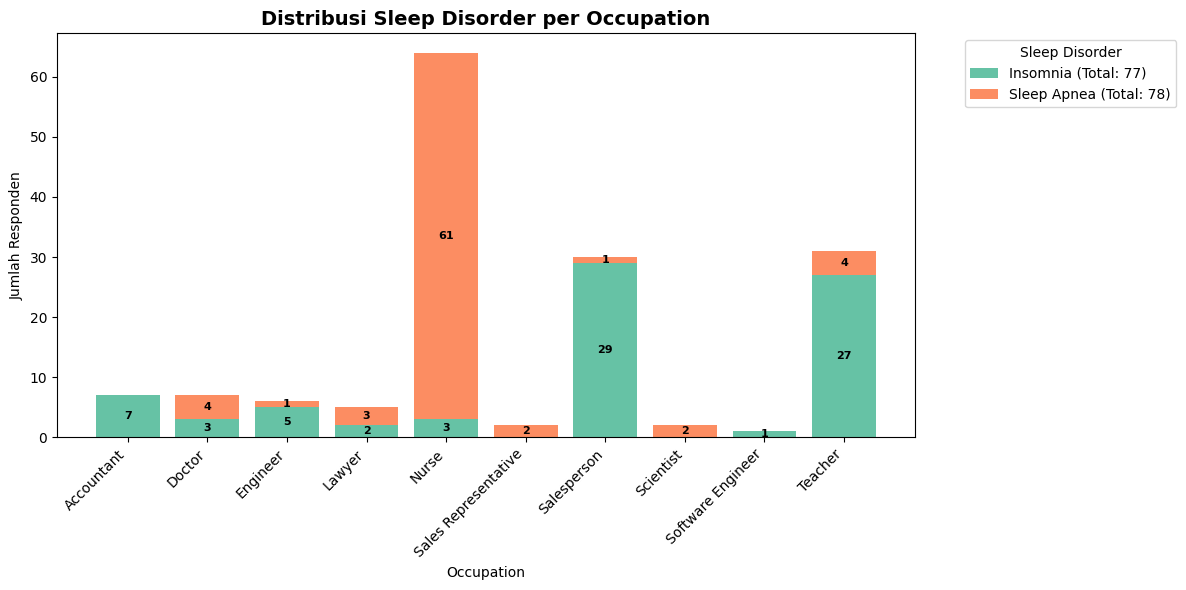

In [10]:
pivot = data_vis.pivot_table(index='Occupation', columns='Sleep Disorder', aggfunc='size', fill_value=0)
totals = pivot.sum()
colors = sns.color_palette("Set2", n_colors=len(pivot.columns))

fig, ax = plt.subplots(figsize=(12, 6))

bottom = [0]*len(pivot)

for i, disorder in enumerate(pivot.columns):
    values = pivot[disorder].values
    bars = ax.bar(pivot.index, values, bottom=bottom, color=colors[i])

    for idx, (b, v) in enumerate(zip(bottom, values)):
        if v > 0:
            ax.text(idx, b + v/2, str(v), ha='center', va='center',
                    fontsize=8, color='black', fontweight='bold')
    bottom = [b + v for b, v in zip(bottom, values)]

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Occupation")
ax.set_title("Distribusi Sleep Disorder per Occupation",
             fontsize=14, fontweight='bold')
ax.set_xticklabels(pivot.index, rotation=45, ha='right')


legend_elements = [Patch(facecolor=colors[i], label=f"{disorder} (Total: {totals[disorder]})")
                   for i, disorder in enumerate(pivot.columns)]
ax.legend(handles=legend_elements, title="Sleep Disorder",
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## 👨‍👩‍👧 Distribusi Sleep Disorder per Gender
Distribusi **Sleep Disorder vs Gender** menunjukkan bagaimana gangguan tidur tersebar di antara laki-laki dan perempuan. 💡  
Dengan melihat visualisasi ini, kita dapat mengidentifikasi apakah ada perbedaan signifikan antara gender dalam hal jenis gangguan tidur yang dialami.


C:\Users\ACER\AppData\Local\Temp\ipykernel_27464\2620208824.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pivot.index, rotation=45, ha='right')


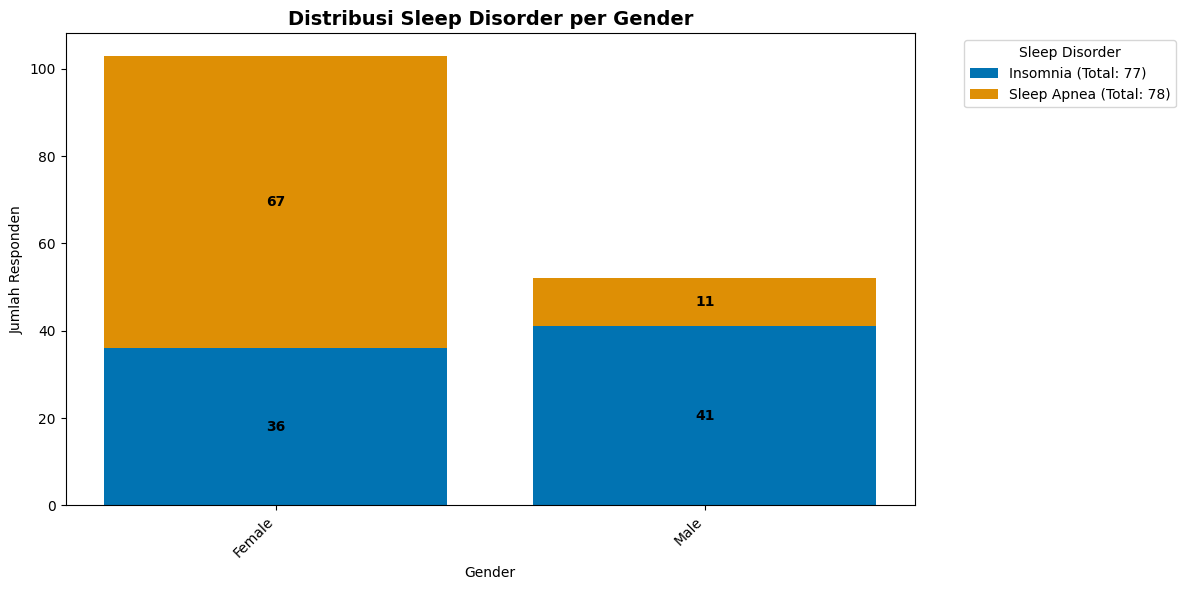

In [11]:
pivot = data_vis.pivot_table(index='Gender', columns='Sleep Disorder', aggfunc='size', fill_value=0)
totals = pivot.sum()
colors = sns.color_palette("colorblind", n_colors=len(pivot.columns))

fig, ax = plt.subplots(figsize=(12, 6))

bottom = [0]*len(pivot)

for i, disorder in enumerate(pivot.columns):
    values = pivot[disorder].values
    bars = ax.bar(pivot.index, values, bottom=bottom, color=colors[i])

    for idx, (b, v) in enumerate(zip(bottom, values)):
        if v > 0:
            ax.text(idx, b + v/2, str(v), ha='center', va='center',
                    fontsize=10, color='black', fontweight='bold')
    bottom = [b + v for b, v in zip(bottom, values)]

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Gender")
ax.set_title("Distribusi Sleep Disorder per Gender",
             fontsize=14, fontweight='bold')
ax.set_xticklabels(pivot.index, rotation=45, ha='right')


legend_elements = [Patch(facecolor=colors[i], label=f"{disorder} (Total: {totals[disorder]})")
                   for i, disorder in enumerate(pivot.columns)]
ax.legend(handles=legend_elements, title="Sleep Disorder",
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## 🏥 Distribusi Sleep Disorder per BMI Category
Visualisasi **Sleep Disorder vs BMI Category** menunjukkan hubungan antara kondisi fisik (BMI) dan jenis gangguan tidur. 🌿  
Stacked bar chart ini membantu kita memahami pola kesehatan tidur, misalnya apakah kelompok `Obese` cenderung mengalami `Sleep Apnea` lebih banyak dibandingkan kelompok lainnya.

C:\Users\ACER\AppData\Local\Temp\ipykernel_27464\4218336310.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pivot.index, rotation=45, ha='right')


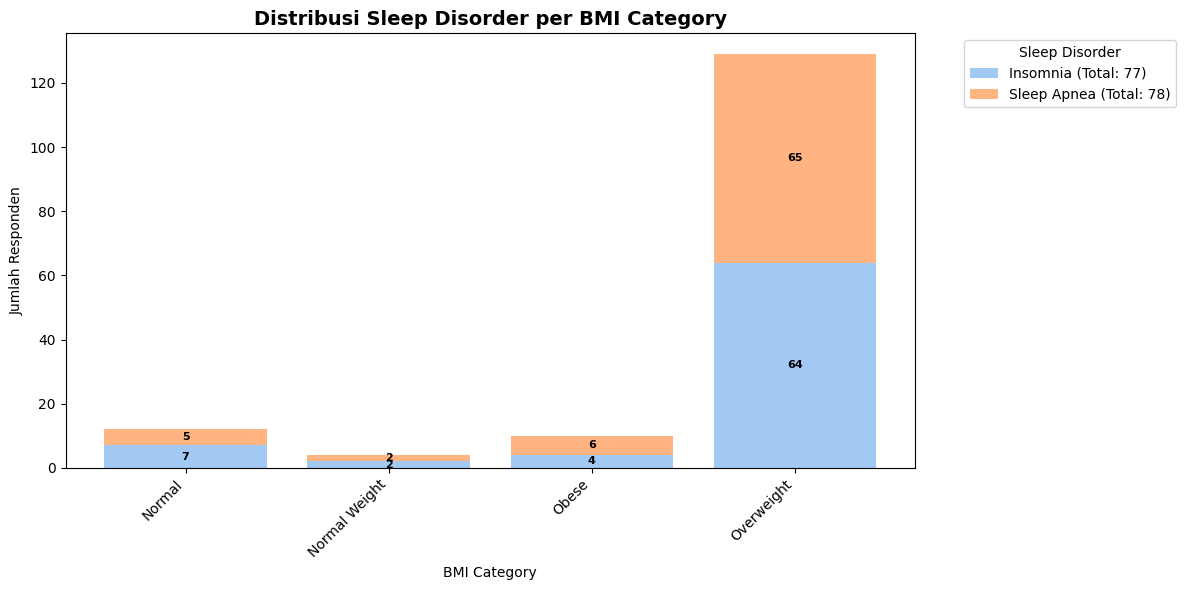

In [12]:
pivot = data_vis.pivot_table(
    index='BMI Category', columns='Sleep Disorder', aggfunc='size', fill_value=0)
totals = pivot.sum()
colors = sns.color_palette("pastel", n_colors=len(pivot.columns))

fig, ax = plt.subplots(figsize=(12, 6))

bottom = [0]*len(pivot)

for i, disorder in enumerate(pivot.columns):
    values = pivot[disorder].values
    bars = ax.bar(pivot.index, values, bottom=bottom, color=colors[i])

    for idx, (b, v) in enumerate(zip(bottom, values)):
        if v > 0:
            ax.text(idx, b + v/2, str(v), ha='center', va='center',
                    fontsize=8, color='black', fontweight='bold')
    bottom = [b + v for b, v in zip(bottom, values)]

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("BMI Category")
ax.set_title("Distribusi Sleep Disorder per BMI Category",
             fontsize=14, fontweight='bold')
ax.set_xticklabels(pivot.index, rotation=45, ha='right')


legend_elements = [Patch(facecolor=colors[i], label=f"{disorder} (Total: {totals[disorder]})")
                   for i, disorder in enumerate(pivot.columns)]
ax.legend(handles=legend_elements, title="Sleep Disorder",
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# ⛏️ Data Mining

In [13]:
# Copy Data untuk Data Mining dan Machine Learning
data_res = clean_data.copy()

## 🎛️ Correlation Matrix

Correlation matrix digunakan untuk melihat sejauh mana hubungan antar variabel dalam dataset. Nilai korelasi berada pada rentang -1 hingga +1, di mana nilai mendekati +1 menunjukkan hubungan positif yang kuat 🔴, nilai mendekati -1 menunjukkan hubungan negatif yang kuat 🔵, dan nilai mendekati 0 menunjukkan hubungan yang lemah atau hampir tidak ada ⚪. Pada heatmap, warna merah menggambarkan korelasi positif, sedangkan warna biru menunjukkan korelasi negatif. Semakin pekat warnanya, semakin kuat pula hubungan antar variabel tersebut. Analisis ini berguna untuk mengidentifikasi variabel yang memiliki keterkaitan tinggi, mendeteksi potensi multikolinearitas, serta membantu pemilihan fitur yang relevan dalam proses pemodelan machine learning 🧠.


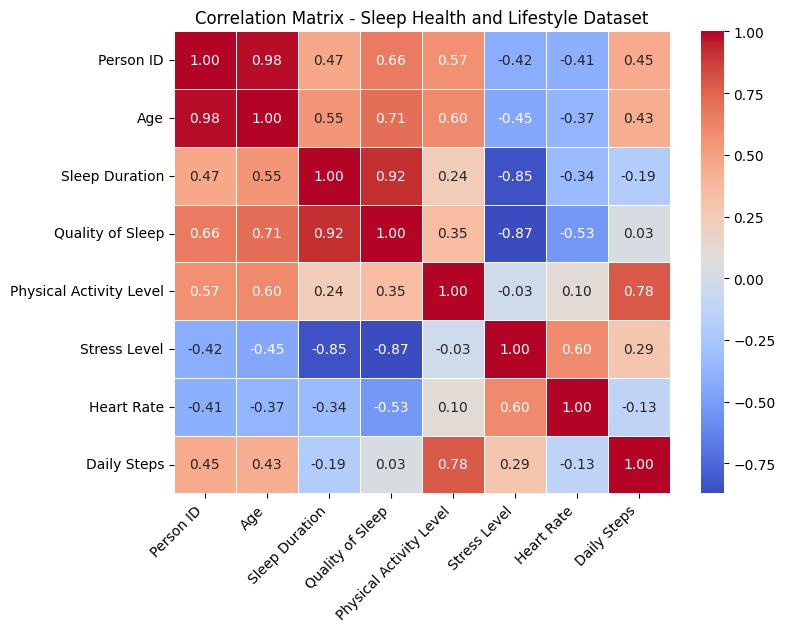

In [14]:
# Ambil hanya kolom numerik
numeric_df = data_res.select_dtypes(include=['int64', 'float64'])

# Hitung correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Sleep Health and Lifestyle Dataset")
plt.xticks(rotation=45, ha='right')
plt.show()


## 📊 Hubungan Antar Fitur Berdasarkan Correlation Matrix

| **Fitur**                    | **Hubungan Terkuat (dari matrix)** | **Nilai Korelasi** | **Interpretasi**                                                                                                 |
| ---------------------------- | ---------------------------------- | ----------------- | ---------------------------------------------------------------------------------------------------------------- |
| Sleep Duration               | Quality of Sleep                   | 0.92              | Korelasi positif sangat kuat; semakin lama tidur, kualitas tidur cenderung lebih baik.                           |
| Quality of Sleep             | Sleep Duration                     | 0.92              | Korelasi positif sangat kuat; kualitas tidur meningkat seiring dengan durasi tidur.                              |
| Physical Activity Level      | Daily Steps                        | 0.78              | Korelasi positif kuat; semakin banyak aktivitas fisik, jumlah langkah harian cenderung tinggi.                   |
| Stress Level                 | Quality of Sleep                   | -0.87             | Korelasi negatif sangat kuat; semakin tinggi tingkat stres, kualitas tidur cenderung menurun.                     |
| BMI Category                 | Physical Activity Level             | 0.78              | Korelasi positif cukup kuat; kategori BMI berhubungan dengan tingkat aktivitas fisik.                             |
| Occupation                   | Age                                | 0.60              | Korelasi sedang; jenis pekerjaan terkait dengan rentang usia responden.                                          |

## 📝 Penjelasan

Berdasarkan correlation matrix, fitur yang dipilih (`Occupation`, `Sleep Duration`, `Quality of Sleep`, `Physical Activity Level`, `Stress Level`, `BMI Category`) memiliki hubungan yang logis dan relevan untuk analisis kesehatan tidur.

- **Sleep Duration** dan **Quality of Sleep** menunjukkan korelasi sangat tinggi, artinya durasi tidur yang lebih lama umumnya berkaitan dengan kualitas tidur yang lebih baik.  
- **Stress Level** memiliki korelasi negatif kuat dengan kualitas tidur, menegaskan bahwa stres tinggi berdampak buruk pada kualitas tidur.  
- **Physical Activity Level** berkorelasi positif dengan jumlah langkah harian dan BMI, menandakan bahwa tingkat aktivitas fisik memengaruhi kesehatan tubuh secara keseluruhan.  
- **Occupation** dipilih karena meskipun korelasinya sedang dengan usia, fitur ini memberikan konteks sosial dan gaya hidup responden yang relevan.  

Fitur-fitur ini dipertahankan agar model dapat menangkap pola yang signifikan dalam prediksi kesehatan tidur, sambil mengurangi risiko multikolinearitas dari variabel lain yang terlalu berkorelasi tinggi.


## Pemilihan Feature dan Label 🏷️
Pemilihan feature dan label menentukan variabel input (feature) dan variabel target (label) yang akan diprediksi. Feature dipilih berdasarkan relevansi dan kontribusinya terhadap prediksi target, sedangkan label merupakan variabel yang menjadi fokus prediksi. Proses ini membantu model fokus pada informasi yang penting, mengurangi kebisingan data 🔇, dan meningkatkan akurasi prediksi serta kinerja model secara keseluruhan 🚀.



In [15]:
feature_columns = [
    'Occupation',
    'Sleep Duration',
    'Quality of Sleep',
    'Physical Activity Level',
    'Stress Level',
    'BMI Category'
]
label_column = 'Sleep Disorder'

feature = data_res[feature_columns]
label = data_res[label_column]


## 🔢 Encoding Kategori ke Bentuk Numerik
Beberapa kolom dalam dataset berupa kategori, seperti  Occupation, dan BMI Category, yang tidak dapat langsung digunakan oleh algoritma machine learning. Encoding kategori ke bentuk numerik mengubah data ini menjadi angka menggunakan teknik seperti Label Encoding 🔢. Proses ini memungkinkan model memproses data secara matematis ➕➖, mempertahankan informasi dari kolom kategori, serta memastikan fitur tersebut dapat berkontribusi dalam pelatihan model.


In [16]:
feature = feature.copy()

# Encode kolom kategorikal
categorical_cols = ['Occupation', 'BMI Category']
label_encoders = {}

# pastikan string label_encoders[col] = le
for col in categorical_cols: 
    le = LabelEncoder() 
    feature[col] = le.fit_transform(feature[col].astype(str))


## ⚙️ Standarisasi dan Pembagian Data
Standarisasi dan pembagian data dilakukan agar fitur memiliki skala yang seragam dan model dapat dievaluasi dengan baik. Standarisasi menormalkan nilai fitur sehingga memiliki rata-rata 0 dan standar deviasi 1 ⚖️, mencegah fitur dengan skala besar mendominasi model. Selanjutnya, dataset dibagi menjadi data train dan data test 📝, sehingga model dapat belajar dari data training dan dievaluasi secara objektif pada data testing. Tahap ini penting untuk menilai kinerja model secara akurat dan mengurangi risiko overfitting 🔒.

In [17]:
# Standarisasi fitur numerik
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(feature)

# Split dataset
feature_train, feature_test, label_train, label_test = train_test_split(
    feature_scaled, label, test_size=0.2, random_state=42, stratify=label
)


# ⚡ Implementasi Model


## 🌲 Random Forest  
Random Forest adalah algoritma ensemble yang menggunakan **banyak pohon keputusan (decision trees)** untuk membuat prediksi. Setiap pohon memberikan suara, dan hasil akhir ditentukan oleh mayoritas suara. Model ini efektif dalam menangani dataset yang kompleks dan mengurangi risiko overfitting. Confusion matrix menunjukkan distribusi prediksi yang lebih stabil di berbagai kelas, menandakan kemampuan model mengenali pola dengan baik.


Accuracy: 90.32%

Classification Report - Random Forest:
               precision    recall  f1-score   support

    Insomnia       0.88      0.93      0.90        15
 Sleep Apnea       0.93      0.88      0.90        16

    accuracy                           0.90        31
   macro avg       0.90      0.90      0.90        31
weighted avg       0.91      0.90      0.90        31



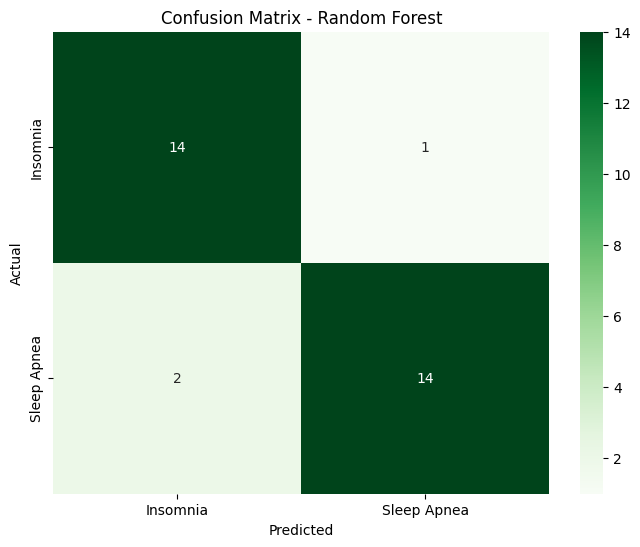

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(feature_train, label_train)

label_pred_rf = rf_model.predict(feature_test)

accuracy = accuracy_score(label_test, label_pred_rf) * 100
print(f"Accuracy: {accuracy:.2f}%")
print("\nClassification Report - Random Forest:\n",
      classification_report(label_test, label_pred_rf))

# Confusion Matrix
cm = confusion_matrix(label_test, label_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


## 🔧 Support Vector Machine (SVM)  
Support Vector Machine digunakan untuk mengklasifikasikan kondisi kesehatan mental berdasarkan fitur yang telah diekstraksi. Algoritma ini bekerja dengan mencari **hyperplane terbaik** yang memisahkan kelas satu dengan yang lain dalam ruang berdimensi tinggi. Pada confusion matrix terlihat bahwa prediksi tersebar merata ke berbagai kelas, menunjukkan adanya kesulitan dalam membedakan kategori secara jelas.


Accuracy: 80.65%

Classification Report:
               precision    recall  f1-score   support

    Insomnia       0.74      0.93      0.82        15
 Sleep Apnea       0.92      0.69      0.79        16

    accuracy                           0.81        31
   macro avg       0.83      0.81      0.80        31
weighted avg       0.83      0.81      0.80        31



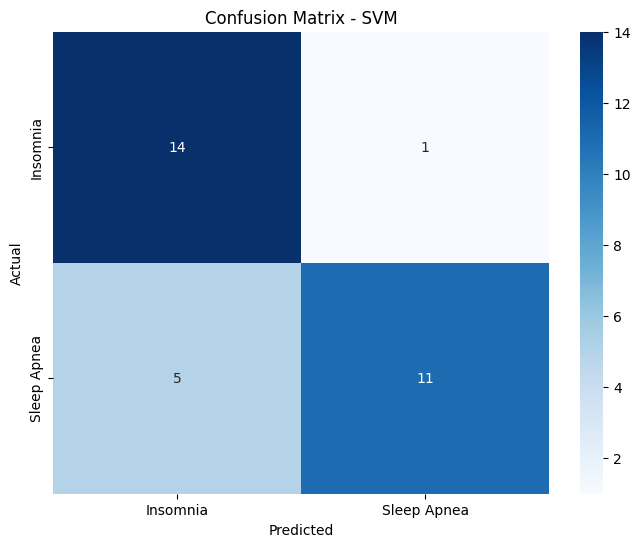

In [19]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(feature_train, label_train)

label_pred_svm = svm_model.predict(feature_test)

accuracy = accuracy_score(label_test, label_pred_svm) * 100
print(f"Accuracy: {accuracy:.2f}%")
print("\nClassification Report:\n",classification_report(label_test, label_pred_svm))

cm = confusion_matrix(label_test, label_pred_svm)

plt.figure(figsize=(8, 6))
colors = np.random.rand(*cm.shape) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


## 👟 K-Nearest Neighbors (KNN)  
K-Nearest Neighbors mengklasifikasikan data baru berdasarkan **kemiripannya dengan data tetangga terdekat**. Model ini mudah dipahami dan tidak memerlukan asumsi distribusi data tertentu. Namun, KNN sensitif terhadap fitur yang memiliki skala berbeda, sehingga normalisasi data penting. Confusion matrix menunjukkan bahwa model cenderung lebih akurat pada kelas dengan jumlah sampel yang banyak.


Accuracy: 87.10%

Classification Report - KNN:
               precision    recall  f1-score   support

    Insomnia       0.82      0.93      0.88        15
 Sleep Apnea       0.93      0.81      0.87        16

    accuracy                           0.87        31
   macro avg       0.88      0.87      0.87        31
weighted avg       0.88      0.87      0.87        31



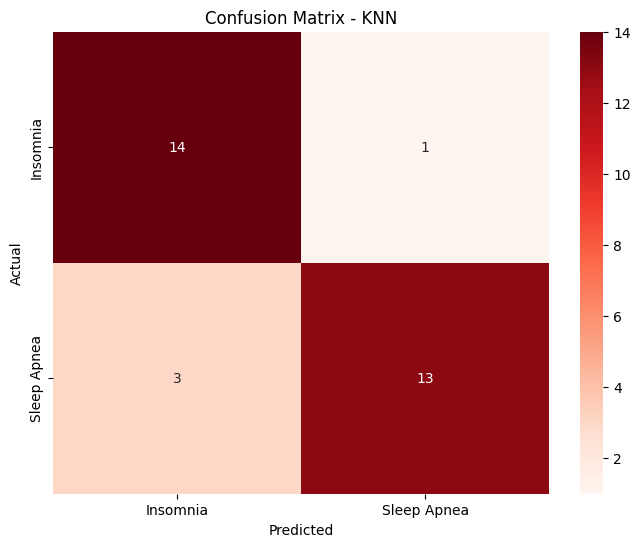

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(feature_train, label_train)

label_pred_knn = knn_model.predict(feature_test)

accuracy = accuracy_score(label_test, label_pred_knn) * 100
print(f"Accuracy: {accuracy:.2f}%")
print("\nClassification Report - KNN:\n",
      classification_report(label_test, label_pred_knn))

cm = confusion_matrix(label_test, label_pred_knn)
plt.figure(figsize=(8, 6))
colors = np.random.rand(*cm.shape)  # warna random tiap sel
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(
    label_test), yticklabels=np.unique(label_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


## 🔬 Naive Bayes  
Naive Bayes adalah algoritma berbasis probabilitas yang menggunakan **teorema Bayes** dengan asumsi independensi antar fitur. Model ini cepat dan efektif untuk dataset besar, terutama dengan fitur kategorikal. Confusion matrix menunjukkan performa yang baik pada kelas dominan, namun mungkin kurang optimal untuk kelas dengan data terbatas.


Accuracy: 83.87%

Classification Report - Naive Bayes:
               precision    recall  f1-score   support

    Insomnia       0.75      1.00      0.86        15
 Sleep Apnea       1.00      0.69      0.81        16

    accuracy                           0.84        31
   macro avg       0.88      0.84      0.84        31
weighted avg       0.88      0.84      0.84        31



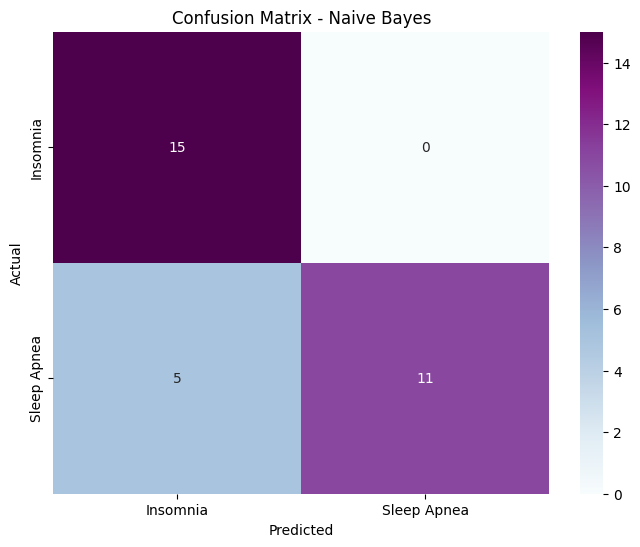

In [21]:
nb_model = GaussianNB()
nb_model.fit(feature_train, label_train)

label_pred_nb = nb_model.predict(feature_test)

accuracy = accuracy_score(label_test, label_pred_nb) * 100
print(f"Accuracy: {accuracy:.2f}%")
print("\nClassification Report - Naive Bayes:\n",
      classification_report(label_test, label_pred_nb))

cm = confusion_matrix(label_test, label_pred_nb)
plt.figure(figsize=(8, 6))
colors = np.random.rand(*cm.shape)
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=np.unique(
    label_test), yticklabels=np.unique(label_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


## 🌳 Decision Tree  
Decision Tree membagi data menjadi subset berdasarkan **kondisi fitur yang paling informatif** sehingga membentuk pohon keputusan. Model ini mudah diinterpretasikan dan dapat menangkap hubungan non-linear antar fitur. Confusion matrix memperlihatkan bahwa model dapat mengenali pola kelas tertentu dengan baik, meski rawan overfitting jika pohon terlalu dalam.

Accuracy: 87.10%

Classification Report - Decision Tree:
               precision    recall  f1-score   support

    Insomnia       0.87      0.87      0.87        15
 Sleep Apnea       0.88      0.88      0.88        16

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



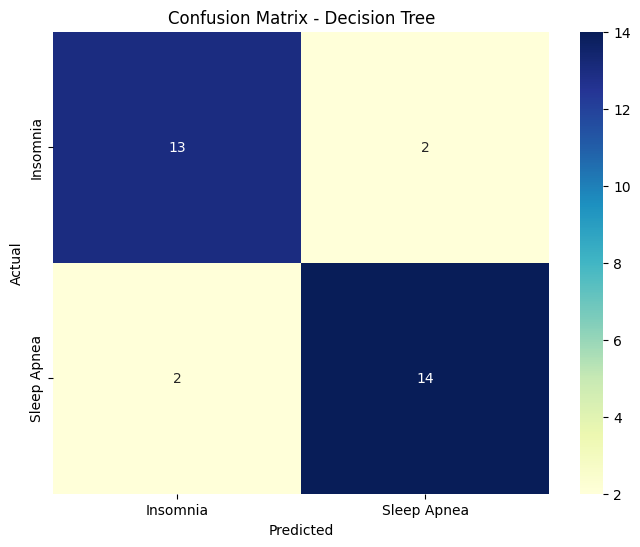

In [22]:
# Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(feature_train, label_train)

# Prediksi
label_pred_dt = dt_model.predict(feature_test)

# Accuracy
accuracy = accuracy_score(label_test, label_pred_dt) * 100
print(f"Accuracy: {accuracy:.2f}%")
print("\nClassification Report - Decision Tree:\n",
      classification_report(label_test, label_pred_dt))

# Confusion Matrix
cm = confusion_matrix(label_test, label_pred_dt)
plt.figure(figsize=(8, 6))
colors = np.random.rand(*cm.shape)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=np.unique(
    label_test), yticklabels=np.unique(label_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


# 🤖 Perbandingan Hasil Model Prediksi Sleep Disorder

Berikut ringkasan hasil uji coba menggunakan berbagai algoritma untuk memprediksi gangguan tidur (`Sleep Disorder`) dalam **satu tabel komparatif**:

| Model           | Accuracy | Insomnia (Precision / Recall / F1) | Sleep Apnea (Precision / Recall / F1) | Keterangan Singkat |
|-----------------|---------|------------------------------------|--------------------------------------|------------------|
| Random Forest 🌲 | 90.32%  | 0.88 / 0.93 / 0.90                | 0.93 / 0.88 / 0.90                   | Akurasi tertinggi dan performa seimbang antar kelas. Cocok untuk menangkap pola non-linear. |
| SVM ⚡           | 80.65%  | 0.74 / 0.93 / 0.82                | 0.92 / 0.69 / 0.79                   | Recall Sleep Apnea rendah, kadang salah klasifikasi. |
| KNN 👟           | 87.10%  | 0.82 / 0.93 / 0.88                | 0.93 / 0.81 / 0.87                   | Performa seimbang, tapi akurasi total sedikit di bawah Random Forest. |
| Naive Bayes 🔬    | 83.87%  | 0.75 / 1.00 / 0.86                | 1.00 / 0.69 / 0.81                   | Bagus untuk mendeteksi Insomnia, kurang optimal untuk Sleep Apnea. |
| Decision Tree 🌳  | 87.10%  | 0.87 / 0.87 / 0.87                | 0.88 / 0.88 / 0.88                   | Mudah diinterpretasikan, performa seimbang tapi akurasi sedikit di bawah Random Forest. |

---

## ✅ Kesimpulan dan Rekomendasi Model
Berdasarkan tabel komparatif, **Random Forest** dipilih sebagai model utama untuk prediksi `Sleep Disorder`.  

**Alasan:**  
- Memiliki **akurasi tertinggi (90.32%)** dibandingkan model lain.  
- Performa **seimbang untuk kedua kelas** (Insomnia dan Sleep Apnea).  
- Mampu menangkap pola **non-linear antar fitur** tanpa banyak penyesuaian parameter.  
- Lebih **stabil dan robust** dibanding Decision Tree tunggal atau KNN.  

Dengan Random Forest, prediksi gangguan tidur dapat dilakukan dengan lebih andal, mendukung analisis dan rekomendasi kesehatan tidur yang akurat.


# 🧩 Prediction

Random Forest digunakan untuk memprediksi **Sleep Disorder** berdasarkan fitur-fitur yang telah disiapkan: `Occupation`, `Sleep Duration`, `Quality of Sleep`, `Physical Activity Level`, `Stress Level`, dan `BMI Category`. Model ini telah dilatih sebelumnya menggunakan data training dan disimpan dalam file `.pkl` agar bisa digunakan kembali tanpa perlu melatih ulang.

## 💾 Save Model Random Forest

Model Random Forest yang sudah dilatih disimpan dalam file `rf_model.pkl` menggunakan modul `pickle`. Hal ini memungkinkan penggunaan kembali model tanpa perlu melatih ulang, sehingga prediksi bisa dilakukan secara cepat dan konsisten.


In [23]:
with open("rf_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Model Random Forest berhasil disimpan ke 'rf_model.pkl'.")

Model Random Forest berhasil disimpan ke 'rf_model.pkl'.


## 🔹 Data Person ID = 17

| Field                     | Value           |
|----------------------------|----------------|
| Person ID                  | 17             |
| Gender                     | Female         |
| Age                        | 29             |
| Occupation                 | Nurse          |
| Sleep Duration             | 6.5            |
| Quality of Sleep           | 5              |
| Physical Activity Level    | 40             |
| Stress Level               | 7              |
| BMI Category               | Normal Weight  |
| Blood Pressure             | 132/87         |
| Heart Rate                 | 80             |
| Daily Steps                | 4000           |
| Sleep Disorder             | Sleep Apnea    |


In [24]:
# Data dengan Person ID = 17
new_data_raw = pd.DataFrame({
    'Occupation': ['Nurse'],
    'Sleep Duration': [6.5],
    'Quality of Sleep': [5],
    'Physical Activity Level': [40],
    'Stress Level': [7],
    'BMI Category': ['Normal Weight']
})

# Salin data
new_data = new_data_raw.copy()

feature_columns = [
    'Occupation',
    'Sleep Duration',
    'Quality of Sleep',
    'Physical Activity Level',
    'Stress Level',
    'BMI Category'
]

# Load Model Random Forest
with open("rf_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

occupation_le = LabelEncoder()
occupation_le.fit(['Nurse', 'Doctor', 'Teacher', 'Engineer', 'Other'])
new_data['Occupation'] = occupation_le.transform(
    new_data['Occupation'].astype(str))

bmi_le = LabelEncoder()
bmi_le.fit(['Underweight', 'Normal Weight', 'Overweight', 'Obese'])
new_data['BMI Category'] = bmi_le.transform(
    new_data['BMI Category'].astype(str))

# Pastikan semua kolom numerik
new_data[feature_columns] = new_data[feature_columns].astype(float)

# Prediksi
prediction = rf_model.predict(new_data[feature_columns].values)
probabilities = rf_model.predict_proba(new_data[feature_columns].values)[0]

# Output
print("📝 Input Data:")
print(new_data_raw.to_string(index=False))

print("\n📊 Probabilitas per Kelas:")
for i, cls in enumerate(rf_model.classes_):
    prob_scalar = float(probabilities[i])
    print(f"{cls} = {prob_scalar*100:.2f}%")

print("\n✅ Hasil Prediksi Sleep Disorder:", prediction[0])


📝 Input Data:
Occupation  Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level  BMI Category
     Nurse             6.5                 5                       40             7 Normal Weight

📊 Probabilitas per Kelas:
Insomnia = 33.66%
Sleep Apnea = 66.34%

✅ Hasil Prediksi Sleep Disorder: Sleep Apnea
